# ICS 474 Project (Uber Data Analysis)


## Part 1: Data Understanding and Exploration

In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
# Replace 'UberDataset.csv' with the path to your dataset file
file_path = 'UberDataset.csv'
uber_data = pd.read_csv(file_path)

# Brief overview of the dataset's content
dataset_info = """
The Uber trip dataset provides details such as:
- Start and end times for trips
- Trip type (Business or Personal)
- Start and end locations
- Distance covered (in miles)
- Purpose of trips (if recorded)

The dataset consists of 1156 rows and 7 columns, and includes some missing values.
"""
print(dataset_info)

# Display basic information about the dataset
print("Dataset Overview:")
print(uber_data.info())



The Uber trip dataset provides details such as:
- Start and end times for trips
- Trip type (Business or Personal)
- Start and end locations
- Distance covered (in miles)
- Purpose of trips (if recorded)

The dataset consists of 1156 rows and 7 columns, and includes some missing values.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [5]:
# Display feature names and their data types
print("Feature Names and Data Types:")
print(uber_data.dtypes)


Feature Names and Data Types:
START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object


In [6]:
# Count missing values in each column
print("Missing Values in the Dataset:")
missing_values = uber_data.isnull().sum()
print(missing_values)


Missing Values in the Dataset:
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [7]:
# Generate basic statistical summaries for numerical features
print("Statistical Summary of the Dataset:")
stat_summary = uber_data.describe()
print(stat_summary)


Statistical Summary of the Dataset:
              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


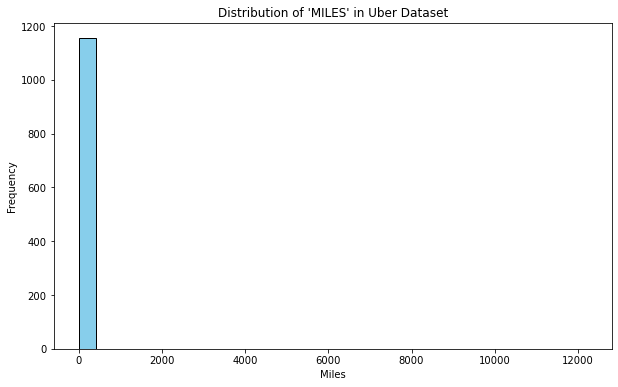

In [8]:
# Visualize the distribution of 'MILES'
plt.figure(figsize=(10, 6))
plt.hist(uber_data['MILES'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of 'MILES' in Uber Dataset")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()


Correlation Matrix:
       MILES
MILES    1.0


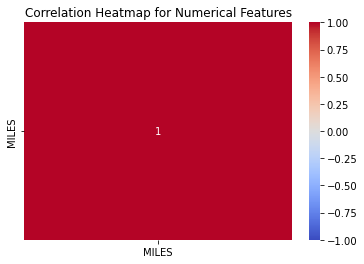

In [9]:
# Calculate correlation matrix for numerical features
# Currently includes only 'MILES'; more features can be added as required
correlation_matrix = uber_data[['MILES']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for visualizing correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


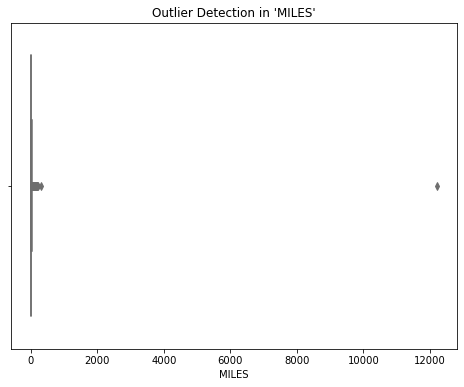

In [10]:
# Boxplot to identify outliers in the 'MILES' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=uber_data, x='MILES', color='lightcoral')
plt.title("Outlier Detection in 'MILES'")
plt.show()


In [11]:
# Calculate Z-scores for 'MILES' and flag outliers
uber_data['MILES_zscore'] = zscore(uber_data['MILES'].dropna())
outliers = uber_data[uber_data['MILES_zscore'].abs() > 3]  # Z-scores > 3 considered outliers

# Display detected outliers
print("Outliers Detected in 'MILES':")
print(outliers[['MILES', 'MILES_zscore']])


Outliers Detected in 'MILES':
        MILES  MILES_zscore
1155  12204.7     33.923995


## Part 2: Data Preprocessing

In [14]:
# Handling Missing Data

# Drop rows with missing values in crucial columns
columns_to_clean = ['END_DATE', 'CATEGORY', 'START', 'STOP']
uber_data.dropna(subset=columns_to_clean, inplace=True)

# Replace missing values in 'PURPOSE' with 'Unknown' to retain as much data as possible
uber_data['PURPOSE'].fillna('Unknown', inplace=True)

# Confirm all missing values have been addressed
print("Missing Values After Handling:")
print(uber_data.isnull().sum())


Missing Values After Handling:
START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
MILES_zscore    0
dtype: int64


In [15]:
# Encoding Categorical Variables

# Apply one-hot encoding to categorical columns 'CATEGORY' and 'PURPOSE'
categorical_columns = ['CATEGORY', 'PURPOSE']
uber_data_encoded = pd.get_dummies(uber_data, columns=categorical_columns, drop_first=True)

# Display a snippet of the encoded dataset
print("Dataset After Encoding Categorical Variables:")
print(uber_data_encoded.head())


Dataset After Encoding Categorical Variables:
         START_DATE          END_DATE        START             STOP  MILES  \
0  01-01-2016 21:11  01-01-2016 21:17  Fort Pierce      Fort Pierce    5.1   
1  01-02-2016 01:25  01-02-2016 01:37  Fort Pierce      Fort Pierce    5.0   
2  01-02-2016 20:25  01-02-2016 20:38  Fort Pierce      Fort Pierce    4.8   
3  01-05-2016 17:31  01-05-2016 17:45  Fort Pierce      Fort Pierce    4.7   
4  01-06-2016 14:42  01-06-2016 15:49  Fort Pierce  West Palm Beach   63.7   

   MILES_zscore  CATEGORY_Personal  PURPOSE_Between Offices  \
0     -0.044593                  0                        0   
1     -0.044872                  0                        0   
2     -0.045429                  0                        0   
3     -0.045707                  0                        0   
4      0.118573                  0                        0   

   PURPOSE_Charity ($)  PURPOSE_Commute  PURPOSE_Customer Visit  \
0                    0                0

In [16]:
# Feature Scaling

# Standardize the 'MILES' column using StandardScaler for uniform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
uber_data_encoded['MILES'] = scaler.fit_transform(uber_data_encoded[['MILES']])

# Display the first few rows to verify scaling
print("Dataset After Scaling 'MILES':")
print(uber_data_encoded[['MILES']].head())


Dataset After Scaling 'MILES':
      MILES
0 -0.253449
1 -0.258085
2 -0.267358
3 -0.271994
4  2.463317


In [17]:
# Create new features: Convert dates and calculate trip duration
uber_data_encoded['START_DATE'] = pd.to_datetime(uber_data_encoded['START_DATE'], errors='coerce')
uber_data_encoded['END_DATE'] = pd.to_datetime(uber_data_encoded['END_DATE'], errors='coerce')

# Calculate trip duration in minutes
uber_data_encoded['TRIP_DURATION'] = (uber_data_encoded['END_DATE'] - uber_data_encoded['START_DATE']).dt.total_seconds() / 60

# Drop columns no longer needed for modeling
columns_to_drop = ['START_DATE', 'END_DATE', 'START', 'STOP']
final_data = uber_data_encoded.drop(columns=columns_to_drop)

# Display the preprocessed dataset
print("Final Preprocessed Dataset:")
print(final_data.head())


Final Preprocessed Dataset:
      MILES  MILES_zscore  CATEGORY_Personal  PURPOSE_Between Offices  \
0 -0.253449     -0.044593                  0                        0   
1 -0.258085     -0.044872                  0                        0   
2 -0.267358     -0.045429                  0                        0   
3 -0.271994     -0.045707                  0                        0   
4  2.463317      0.118573                  0                        0   

   PURPOSE_Charity ($)  PURPOSE_Commute  PURPOSE_Customer Visit  \
0                    0                0                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       1   

   PURPOSE_Errand/Supplies  PURPOSE_Meal/Entertain  PURPOSE_Meeting  \
0                        0                       1         

## Part 2: Modeling

In [20]:
# Import necessary libraries for machine learning tasks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error
import numpy as np

# Standardize all features to handle scaling issues
scaler = StandardScaler()

# Classification: Define features and target
X_classification = scaler.fit_transform(final_data.drop(columns=['CATEGORY_Personal']))
y_classification = final_data['CATEGORY_Personal']  # Binary classification target

# Regression: Define features and target
X_regression = scaler.fit_transform(final_data.drop(columns=['MILES']))
y_regression = final_data['MILES']


In [21]:
# Split data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Split data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)


In [29]:
# Logistic Regression with hyperparameter tuning using GridSearchCV
logistic_model = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)

# Best logistic regression model from GridSearchCV
best_logistic_model = grid_search.best_estimator_
print("Best Logistic Regression Parameters:", grid_search.best_params_)

# Train a Random Forest Classifier as an alternative classification model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_class, y_train_class)

# Train a Linear Regression model for regression tasks
linear_model = LinearRegression()

# Perform cross-validation to evaluate Linear Regression performance
cross_val_scores = cross_val_score(linear_model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
linear_model.fit(X_train_reg, y_train_reg)

# Display cross-validation results
print("Cross-Validation Mean Squared Error for Linear Regression:")
print(f"Mean CV Score (MSE): {-np.mean(cross_val_scores):.2f}")


Best Logistic Regression Parameters: {'C': 0.1}
Cross-Validation Mean Squared Error for Linear Regression:
Mean CV Score (MSE): 0.00


In [31]:
# Evaluate the tuned logistic regression model
y_pred_class_logistic = best_logistic_model.predict(X_test_class)
logistic_accuracy = accuracy_score(y_test_class, y_pred_class_logistic)
logistic_precision = precision_score(y_test_class, y_pred_class_logistic, zero_division=1)
logistic_recall = recall_score(y_test_class, y_pred_class_logistic, zero_division=1)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")


# Evaluate the random forest classifier
y_pred_class_rf = rf_model.predict(X_test_class)
rf_accuracy = accuracy_score(y_test_class, y_pred_class_rf)
rf_precision = precision_score(y_test_class, y_pred_class_rf, zero_division=1)
rf_recall = recall_score(y_test_class, y_pred_class_rf, zero_division=1)

print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")


Logistic Regression Performance:
Accuracy: 0.94
Precision: 1.00
Recall: 0.07

Random Forest Classifier Performance:
Accuracy: 0.92
Precision: 0.29
Recall: 0.13


In [32]:
# Evaluate the linear regression model
y_pred_reg = linear_model.predict(X_test_reg)
regression_mae = mean_absolute_error(y_test_reg, y_pred_reg)
regression_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("\nLinear Regression Performance:")
print(f"Mean Absolute Error (MAE): {regression_mae:.2f}")
print(f"Root Mean Square Error (RMSE): {regression_rmse:.2f}")



Linear Regression Performance:
Mean Absolute Error (MAE): 0.00
Root Mean Square Error (RMSE): 0.00


## Part 4: Visualization

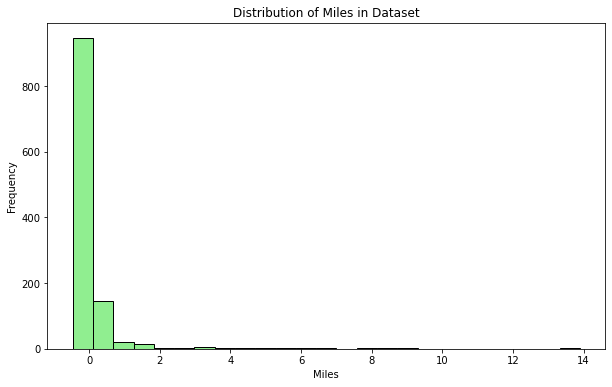

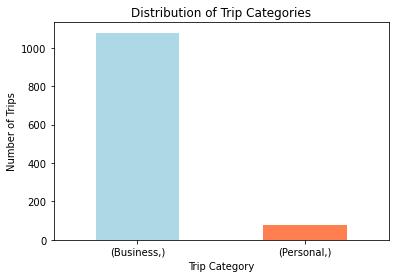

In [33]:
# Visualize the distribution of 'MILES' feature
plt.figure(figsize=(10, 6))
plt.hist(final_data['MILES'], bins=25, edgecolor='black', color='lightgreen')
plt.title("Distribution of Miles in Dataset")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()


# Bar plot to show distribution of trip categories (Personal vs Business)
category_counts = final_data[['CATEGORY_Personal']].replace({1: 'Personal', 0: 'Business'}).value_counts()
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['lightblue', 'coral'])
plt.title("Distribution of Trip Categories")
plt.xlabel("Trip Category")
plt.ylabel("Number of Trips")
plt.xticks(rotation=0)
plt.show()


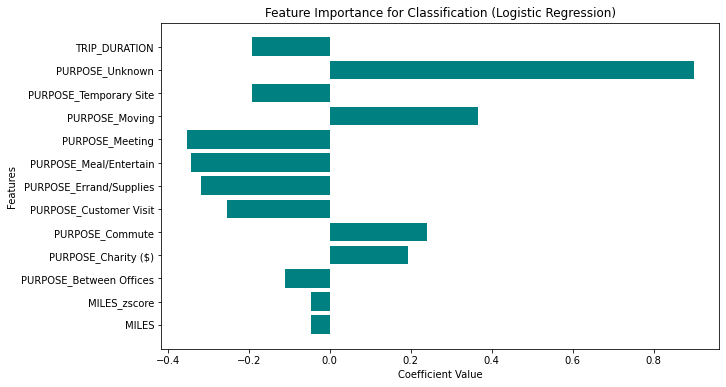

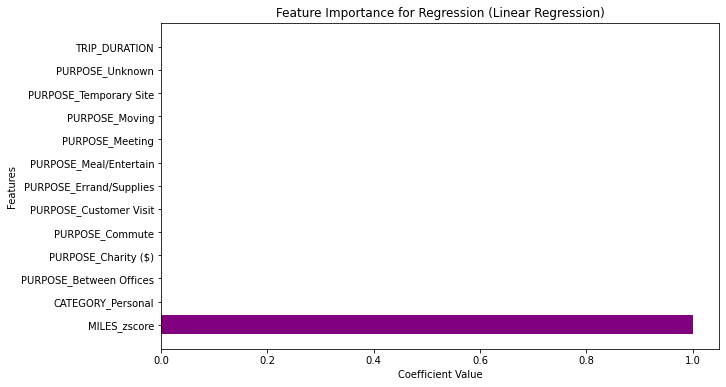

In [34]:
# Feature importance for classification model (Logistic Regression)
classification_feature_names = final_data.drop(columns=['CATEGORY_Personal']).columns

if 'coef_' in dir(best_logistic_model):  # Ensure the model has coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(classification_feature_names, best_logistic_model.coef_[0], color='teal')
    plt.title("Feature Importance for Classification (Logistic Regression)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.show()
else:
    print("The selected classification model does not support coefficient-based feature importance.")

    
# Feature importance for regression model (Linear Regression)
regression_feature_names = final_data.drop(columns=['MILES']).columns

if 'coef_' in dir(linear_model):  # Ensure the model has coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(regression_feature_names, linear_model.coef_, color='purple')
    plt.title("Feature Importance for Regression (Linear Regression)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.show()
else:
    print("The selected regression model does not support coefficient-based feature importance.")


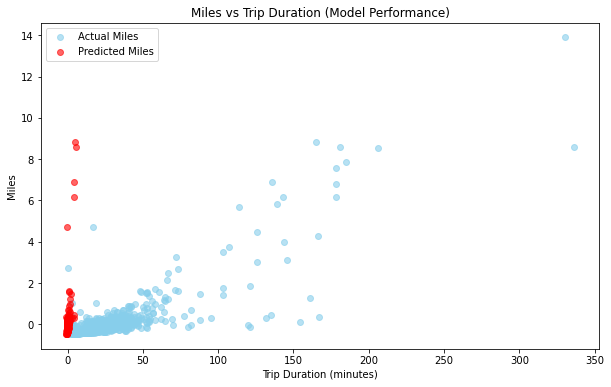

In [35]:
# Scatter plot to visualize regression model predictions vs actual values for 'MILES'
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(final_data['TRIP_DURATION'], final_data['MILES'], alpha=0.6, label="Actual Miles", color='skyblue')

# Scatter plot for predicted values
predicted_duration_index = list(regression_feature_names).index('TRIP_DURATION')  # Find index of 'TRIP_DURATION'
plt.scatter(
    X_test_reg[:, predicted_duration_index], 
    y_pred_reg, 
    alpha=0.6, 
    color='red', 
    label="Predicted Miles"
)

plt.title("Miles vs Trip Duration (Model Performance)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Miles")
plt.legend()
plt.show()
